<a href="https://colab.research.google.com/github/Vishvaish/Machine-Learning-Models/blob/main/RandomForest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Regression**

1. Random Forest Regression is an ensemble learning algorithm capable of performing both Regression and classification task with the use of multiple decision tree and a technique called Bootstrap and aggregation know as bagging. 

2.  It is based on decision trees, but instead of using a single decision tree, it creates multiple decision trees and combines their results to improve the accuracy and stability of the model.

# **The formula for the Random Forest algorithm is as follows:**

1. Randomly select N samples from the training data set.

2. Randomly select a subset of M features from the total features.

3. Construct a decision tree using the selected samples and features.

4. Repeat steps 1-3 K times to create K decision trees.

5. For regression tasks, the output of the Random Forest model is the mean or median of the outputs of all decision trees.


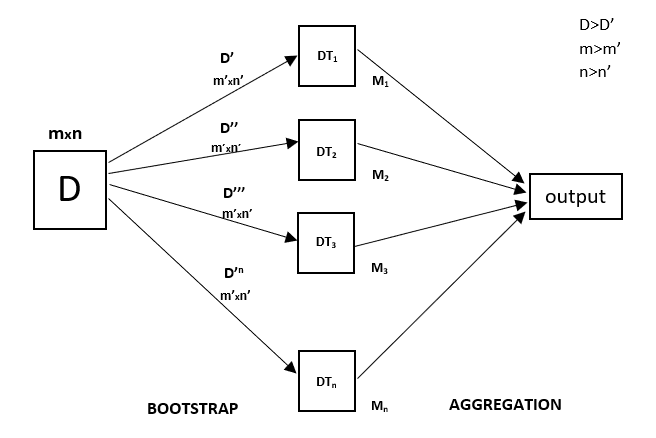

# **Intention**

1. The intention of the code is to perform Random Forest Regression on a marketing dataset to predict the sales generated from YouTube, Facebook, and newspaper advertising. 

2. The code defines a function for the Random Forest Regression algorithm, loads the dataset, and splits the data into input and target variables.

3. It then fits the Random Forest Regression model to the data, calculates the R-squared value to evaluate the goodness of fit of the model, and creates a dataframe for actual and predicted values. 

4. Finally, the code plots the actual and predicted values.

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
R-squared value: 0.978319919087591
   Actual  predicted
0   12.60    12.9036
1   25.68    24.9660
2   14.28    14.4924
3   11.52    11.4372
4   20.88    20.2932


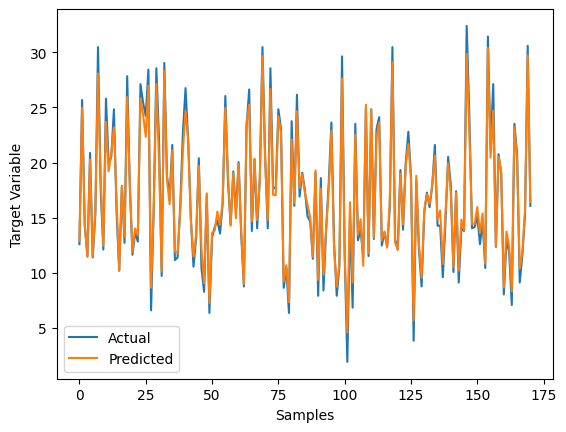

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Define the Random Forest Regression algorithm
def random_forest_regression(X, y, n_trees, max_features):
    y_pred = np.zeros(len(y))
    for i in range(n_trees):
        # Randomly select the features to consider at each split
        features_idx = np.random.choice(X.shape[1], size=max_features, replace=False)
        while len(features_idx) == 0 or np.max(features_idx) >= X.shape[1]:
            features_idx = np.random.choice(X.shape[1], size=max_features, replace=False)
        X_subset = X[:, features_idx]
        
        # Randomly select the samples for each tree
        sample_idx = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
        X_sample = X_subset[sample_idx]
        y_sample = y[sample_idx]
        
        # Fit a decision tree to the data subset
        tree = DecisionTreeRegressor()
        tree.fit(X_sample, y_sample)
        
        # Make predictions for the entire dataset
        y_pred += tree.predict(X_subset)
    
    # Average the predictions over all trees
    y_pred /= n_trees
    
    return y_pred

# Load the dataset
data = pd.read_csv('/content/Marketing_Data.csv')
print(data.head())

# Split the data into input and target variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define the number of trees and maximum number of features to consider at each split
n_trees = 100
max_features = 2 

# Fit the Random Forest Regression model to the data
y_pred = random_forest_regression(X, y, n_trees, max_features)

# Calculate the R-squared value 
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)
print('R-squared value:', r2)

# creating the dataframe for actual and predicted value
df = pd.DataFrame({'Actual':y,'predicted':y_pred})
print(df.head())

# Plot the predicted and actual values
plt.plot(y, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

# **Inference**

1. The Random Forest Regression model predicts the sales generated from advertising on YouTube, Facebook, and newspaper.

2. The R-squared value of 0.97 indicates that about 97.0% of the variation in sales can be explained by the amount spent on advertising on these three platforms.

3. The plot of actual and predicted values shows that the model is able to capture the overall trend in the data very well and provides an accurate approximation of the relationship between advertising spending and sales generated.

4. Overall, the Random Forest Regression model performs very well in predicting sales based on advertising spending on different platforms.

# **Pros of Random Forest Regression:**

1. Robustness: Random forest regression is a robust algorithm that is less prone to overfitting compared to decision tree regression, especially when dealing with large datasets.

2. Non-parametric: Random forest regression is a non-parametric algorithm, meaning it does not make any assumptions about the distribution of the data, and can handle non-linear relationships between variables.

3. Feature importance: Random forest regression provides a measure of feature importance, which can be used to identify the most relevant variables in the prediction process.

4. Scalability: Random forest regression is a highly scalable algorithm that can handle large datasets with many variables.

5. Outlier detection: Random forest regression is good at detecting outliers, which can be helpful in some applications.

#**Cons of Random Forest Regression:**

1. Interpretability: The random forest algorithm is often considered to be a "black box" model, meaning it can be difficult to interpret the reasoning behind its predictions.

2. Computationally expensive: Random forest regression can be computationally expensive, especially when dealing with large datasets or a large number of trees in the forest.

3. Parameter tuning: Random forest regression requires tuning of hyperparameters such as the number of trees and the maximum depth of the trees, which can be time-consuming.

4. Imbalanced datasets: Random forest regression can struggle with imbalanced datasets, where one class is significantly more prevalent than another, leading to biased predictions. This can be mitigated through techniques such as resampling or adjusting class weights.

5. Overfitting: While random forest regression is less prone to overfitting than decision tree regression, it can still overfit to noisy data or in situations where there are too many trees in the forest.
